##$$\LARGE{Hares, lynxes, carrots}$$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
print(a)
year = a[:, 0]
hare = a[:, 1]
lynx = a[:, 2]
carrot = a[:, 3]
#print(year)
#print(hare)
#print(lynx)
#print(carrot)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]



Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

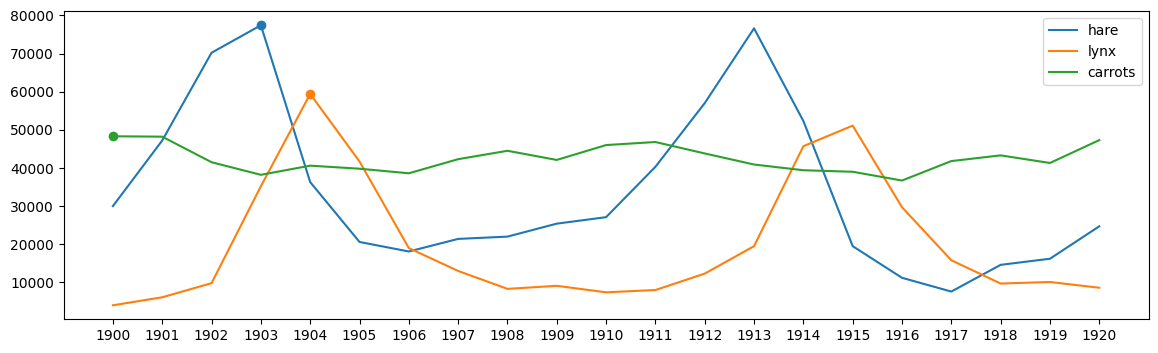

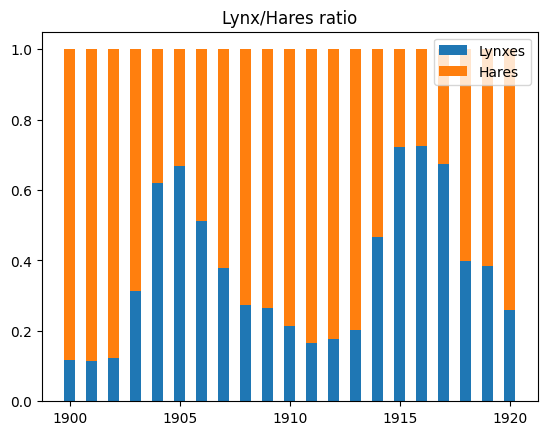

In [ ]:
# 1)Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

plt.figure(figsize=(14, 4))
plt.plot(year, hare, label='hare')
plt.plot(year, lynx, label='lynx')
plt.plot(year, carrot, label='carrots')
plt.xticks(year)

# 2)Find which year each species had the largest population. Mark these years in the plot of populations.

mhare = np.argmax(hare)
plt.scatter(year[mhare], hare[mhare])

mlynx = np.argmax(lynx)
plt.scatter(year[mlynx], lynx[mlynx])

mcarrot = np.argmax(carrot)
plt.scatter(year[mcarrot], carrot[mcarrot])


plt.legend()
plt.show()


# 3)Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

hpl = hare+lynx
hareratio = hare/hpl
lynxratio = lynx/hpl

species = (year)
weight_counts = {
    "Lynxes": np.array(lynxratio),
    "Hares": np.array(hareratio),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(year))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Lynx/Hares ratio")
ax.legend(loc="upper right")



Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

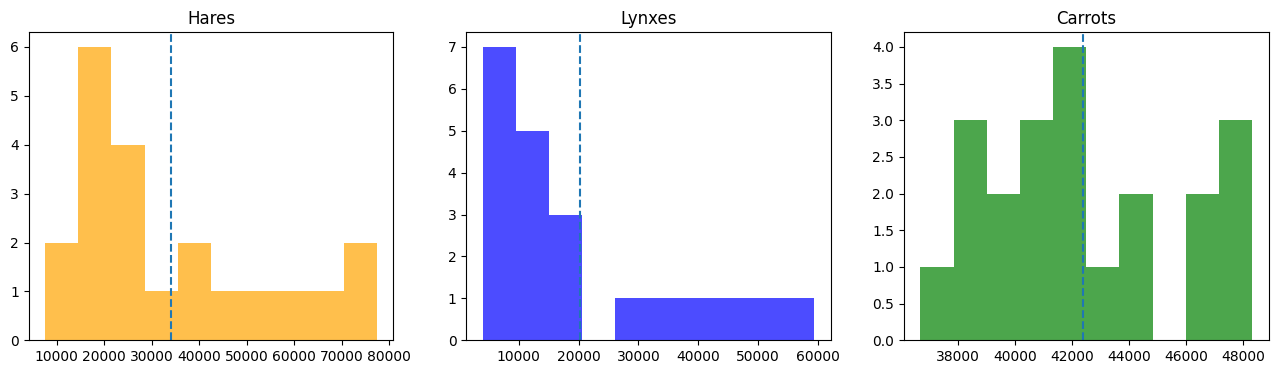

In [ ]:


hare_mean, hare_std = np.mean(hare), np.std(hare)
lynx_mean, lynx_std = np.mean(lynx), np.std(lynx)
carrot_mean, carrot_std = np.mean(carrot), np.std(carrot)


plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
plt.title('Hares')
plt.hist(hare, bins=10, color='orange', alpha=0.7)
plt.axvline(hare_mean, linestyle='dashed')

plt.subplot(1,3,2)
plt.title('Lynxes')
plt.hist(lynx, bins=10, color='blue', alpha=0.7)
plt.axvline(lynx_mean, linestyle='dashed')

plt.subplot(1,3,3)
plt.title('Carrots')
plt.hist(carrot, bins=10, color='green', alpha=0.7)
plt.axvline(carrot_mean, linestyle='dashed')




Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

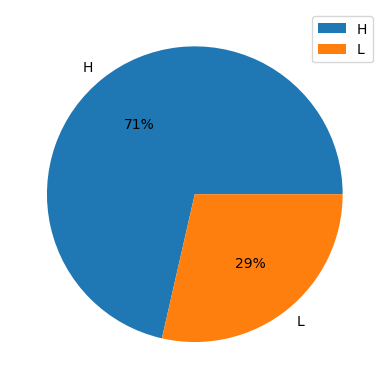

In [ ]:
#diff = hare - lynx
#hml = np.sign(diff)
#w = []
#w[hml==1] = 'H'
#w[hml==-1] = 'L'


HorL = np.where(hare>lynx, 'H', 'L')
ui, uc = np.unique(HorL, return_counts=True)

plt.pie(uc, labels = ui, autopct='%1.0f%%')
plt.legend()

Plot the change in the hare population and in the hare population for each year. Find the correlation coefficient between the both time series.

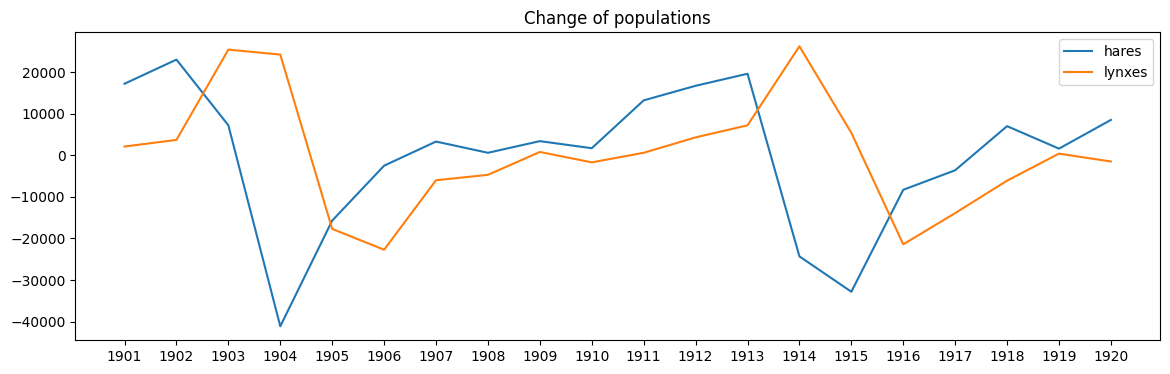

-0.1780136594118296

In [ ]:
harediff = np.diff(hare)
lynxdiff = np.diff(lynx)

plt.figure(figsize=(14, 4))
plt.plot(year[1:], harediff, label='hares')
plt.plot(year[1:], lynxdiff, label='lynxes')
plt.title('Change of populations')
plt.xticks(year[1:])
plt.legend()
plt.show()

np.corrcoef(harediff, lynxdiff)[0][1]

Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

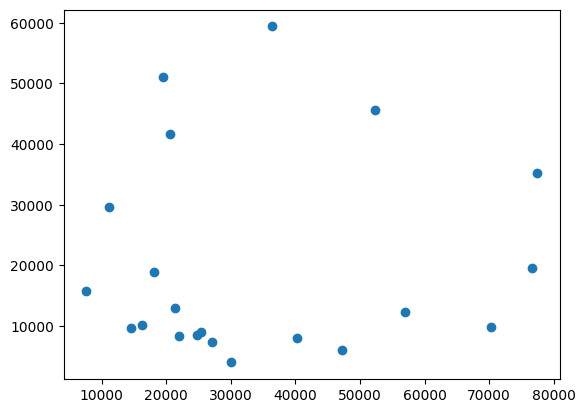

In [ ]:
plt.scatter(hare, lynx)

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
y = hare[:-1]
x = year[:-1]

#построим оценку методом наименьшего среднеквадратичного отклонения
#y=ax+b

my = np.mean(y)
mx = np.mean(x)
mx2 = np.mean(x**2)
mxy = np.mean(x*y)

b = (my*mx2 - mxy*mx)/(mx2 - mx**2)
a = (mxy - b*mx)/mx2

predict = a*1920+b
print('predict:', predict)
real = hare[20]
print('real:', real)
error = abs(real - predict)
print('error:', error)
ratio = error/real
print('ratio:', ratio)


predict: 19775.78947368404
real: 24700.0
error: 4924.210526315961
ratio: 0.19936075005327777


$$ \LARGE{kNN} $$